<a href="https://colab.research.google.com/github/DaffaStyn11/PCVK_2023/blob/main/pcvk_p12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive

drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [25]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


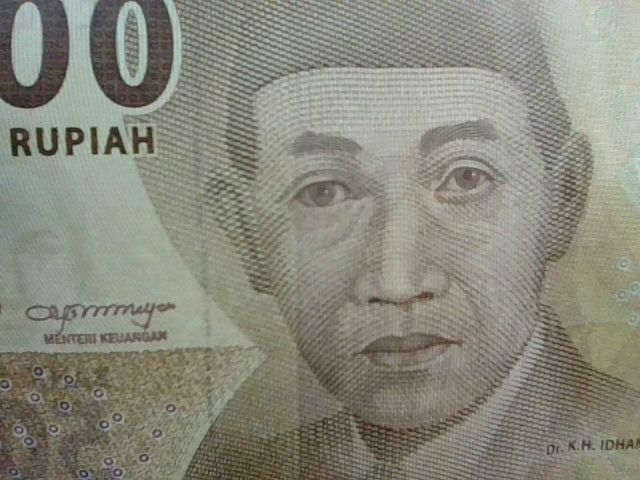

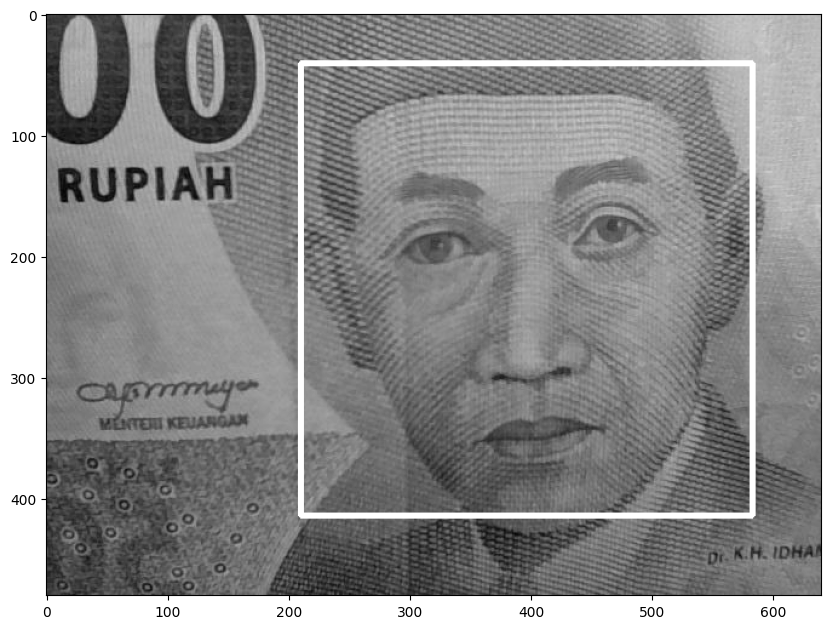

In [34]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

  cascade_wajah = cv2.CascadeClassifier('/content/drive/MyDrive/Images/haarcascade_frontalface_alt.xml')
jokowi = cv2.imread('photo.jpg',0)
roi_wajah = cascade_wajah.detectMultiScale(jokowi) 
for(x,y,w,h) in roi_wajah:cv2.rectangle(jokowi,(x,y),(x+w,y+h),(255,255,255),3)
plt.figure(figsize = (10,10))
plt.imshow(jokowi, cmap='gray')


In [42]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import PIL
import io
import html
import time

<ipython-input-44-b766d5f63219>:44: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(321),plt.imshow(convertToRGB(jokowi_1))
<ipython-input-44-b766d5f63219>:45: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(322),plt.imshow(convertToRGB(jokowi_2))
<ipython-input-44-b766d5f63219>:47: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(323),plt.imshow(convertToRGB(kartini_1))
<ipython-input-44-b766d5f63219>:48: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt

(<Axes: >, <matplotlib.image.AxesImage at 0x7fed5d6e1c90>)

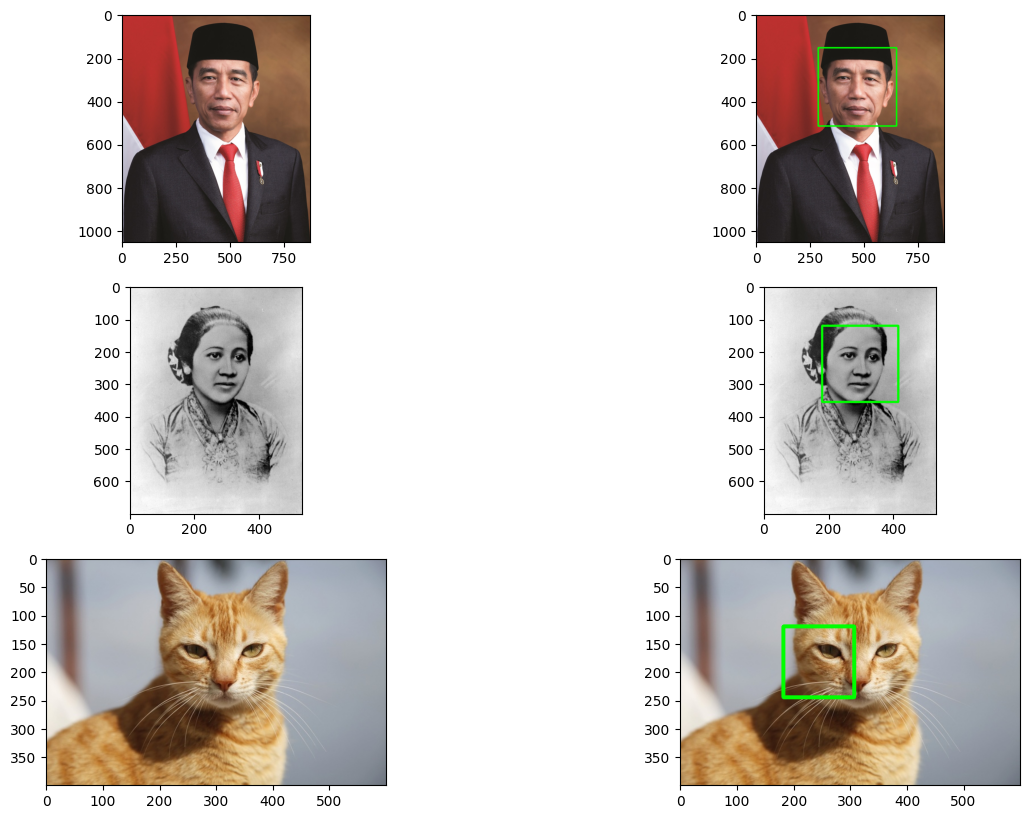

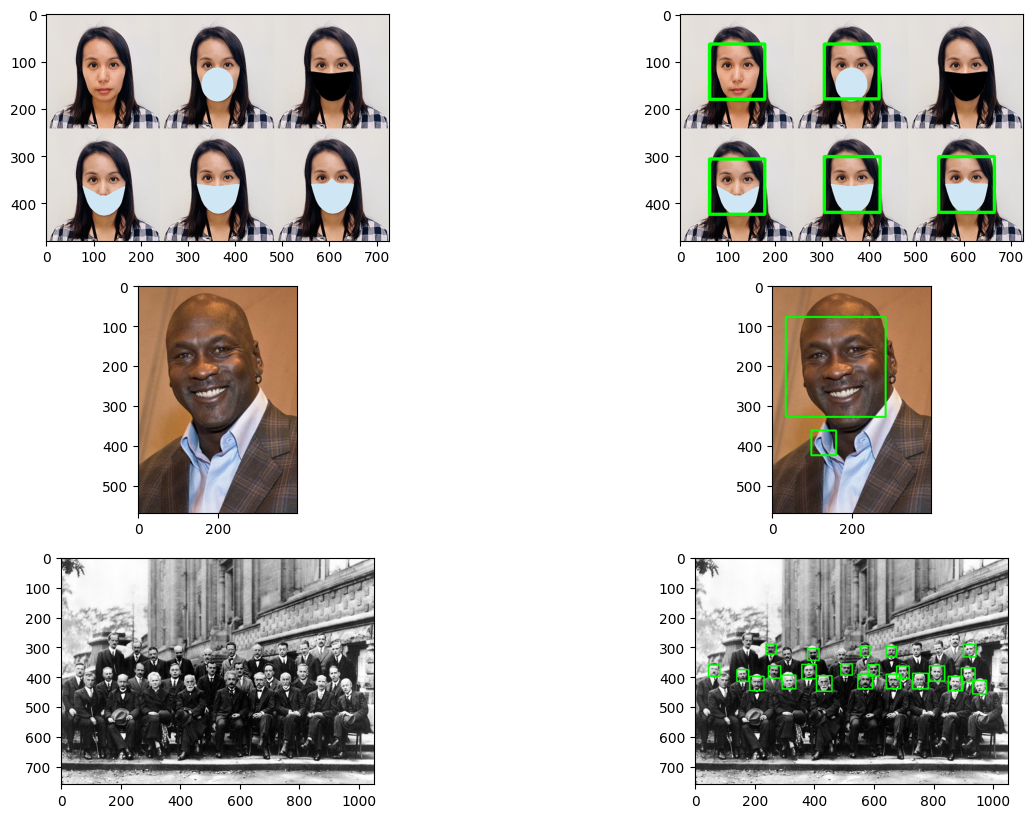

In [44]:
jokowi_1 = cv2.imread('/content/drive/MyDrive/Images/jokowi.jpg')
jokowi_2 = cv2.imread('/content/drive/MyDrive/Images/jokowi.jpg')

kartini_1 = cv2.imread('/content/drive/MyDrive/Images/kartini.jpg')
kartini_2 = cv2.imread('/content/drive/MyDrive/Images/kartini.jpg')

kucing_1 = cv2.imread('/content/drive/MyDrive/Images/mycat.jpg')
kucing_2 = cv2.imread('/content/drive/MyDrive/Images/mycat.jpg')

mask_1 = cv2.imread('/content/drive/MyDrive/Images/mask.png')
mask_2 = cv2.imread('/content/drive/MyDrive/Images/mask.png')

mjordan_1 = cv2.imread('/content/drive/MyDrive/Images/mjordan.jpg')
mjordan_2 = cv2.imread('/content/drive/MyDrive/Images/mjordan.jpg')

solvayconf_1 = cv2.imread('/content/drive/MyDrive/Images/solvayconf.jpg')
solvayconf_2 = cv2.imread('/content/drive/MyDrive/Images/solvayconf.jpg')

def convertToRGB(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
def faceCascadeFunction(image, thickness):
  faces_rects = faceCascade.detectMultiScale(image, scaleFactor = 1.2, minNeighbors = 5);
  for (x,y,w,h) in faces_rects:
      cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), thickness)

# Gambar Jokowi
faceCascadeFunction(jokowi_2, 5)
# Gambar Kartini
faceCascadeFunction(kartini_2, 5)
# Gambar Kucing
faceCascadeFunction(kucing_2, 5)
# Gambar Mask
faceCascadeFunction(mask_2, 5)
# Gambar Mjordan
faceCascadeFunction(mjordan_2, 3)
# Gambar Solvayconf
faceCascadeFunction(solvayconf_2, 3)

f, axarr = plt. subplots(6,2,figsize=(15,10)) # Untuk mengatur tabel dan ukuran gambar yang akan ditampilkan

# Menampilkan setiap gambar
plt.subplot(321),plt.imshow(convertToRGB(jokowi_1))
plt.subplot(322),plt.imshow(convertToRGB(jokowi_2))

plt.subplot(323),plt.imshow(convertToRGB(kartini_1))
plt.subplot(324),plt.imshow(convertToRGB(kartini_2))

plt.subplot(325),plt.imshow(convertToRGB(kucing_1))
plt.subplot(326),plt.imshow(convertToRGB(kucing_2))

f, axarr = plt. subplots(6,2,figsize=(15,10))
plt.subplot(321),plt.imshow(convertToRGB(mask_1))
plt.subplot(322),plt.imshow(convertToRGB(mask_2))

plt.subplot(323),plt.imshow(convertToRGB(mjordan_1))
plt.subplot(324),plt.imshow(convertToRGB(mjordan_2))

plt.subplot(325),plt.imshow(convertToRGB(solvayconf_1))
plt.subplot(326),plt.imshow(convertToRGB(solvayconf_2))